In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
from math import pi

with MPRester("f8gAbZFioEswIMUD") as m:

    band_structure = m.get_phonon_bandstructure_by_material_id("mp-961646")
    
BSPlot = PhononBSPlotter(band_structure)

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Récupération de données et affichage de la structure des bandes de phonons

In [2]:
phonplot = PhononBSPlotter(band_structure) # donne accès à des données des structures de bandes
data = phonplot.bs_plot_data() # récupération générale des données
pts = data.get("ticks").get("label") # liste des points 
dist = data.get("ticks").get("distance") # liste des distances du parcours par rapport à l'origine
freq = data.get("frequency") # listes des fréquences de chaque point
distfull = data.get("distances") # liste de listes des distances de chaque point considéré le long du parcours


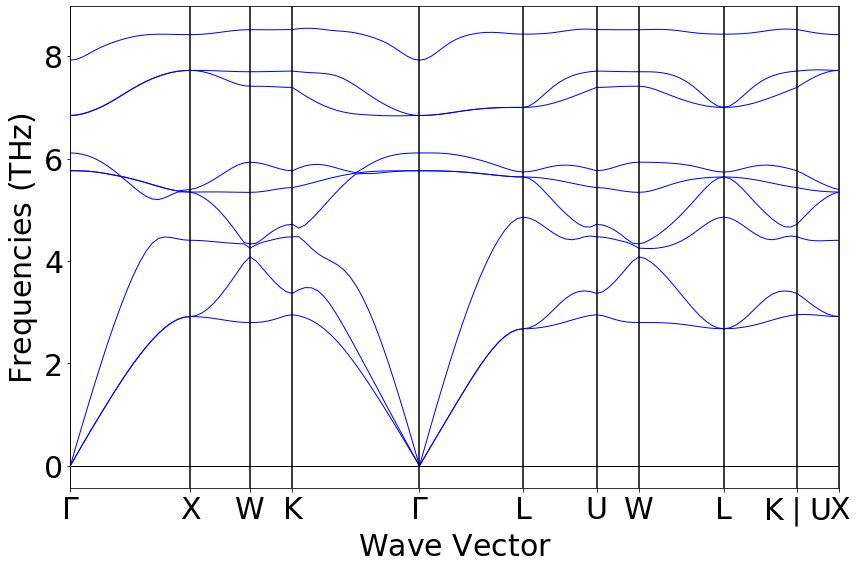

In [3]:
phonplot.show()

## Vitesse du son

La vitesse de propagation d'un phonon, et donc la vitesse du son, est donnée par la pente de la relation de dispersion.C'est à dire la dérivée de la pulsation du phonon selon le vecteur d'onde. La relation de dispersion peut être approximée de manière linéraire. Ainsi la vitesse du son obtenue sera une constante.
L'étude de la vitesse du son sera donc réalisée dans 3 sections différentes de la zone de Brillouin, à proximité de l'origine Gamma.

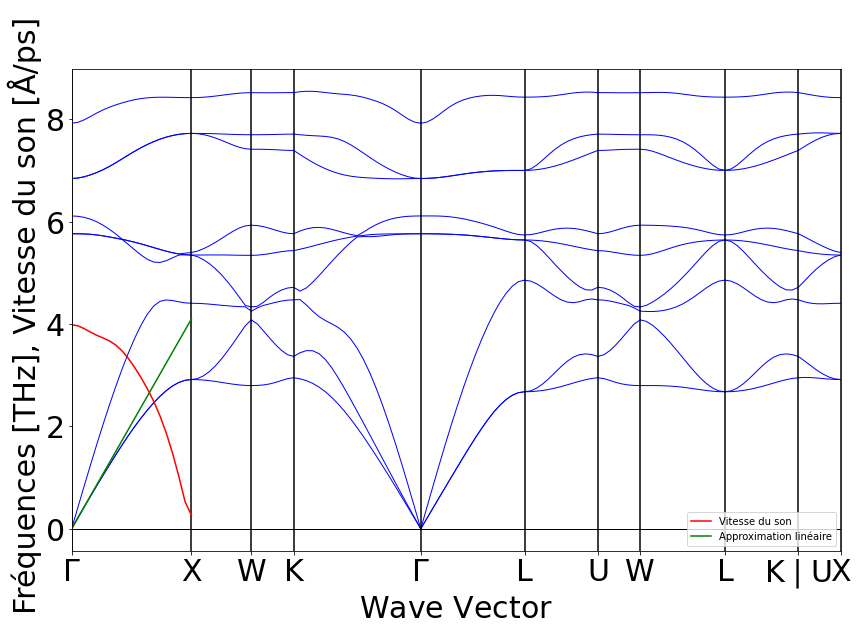

Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours Γ->X.
La vitesse maximale atteinte vaut 3.9849823383488574 [Å/ps].
La vitesse minimale atteinte vaut 0.26630114321705234 [Å/ps].
L'approximation donne quant à elle une valeur de 3.9849823383488574 [Å/ps], correspondant bien à la vitesse en Γ.


In [4]:
fr = freq[0][0] # première branche 
d = distfull[0]
v = np.gradient(fr,d[1]-d[0]) # dérivée de la pulsation
pente = v[0]
lin = np.multiply(pente,d) # approximation 
plt = phonplot.get_plot()
plt.plot(d, v, color="red", label="Vitesse du son")
plt.plot(d, lin, color="green", label="Approximation linéaire")
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps] ") 
plt.legend()
plt.show()
print("Sur ce gaphe la vitesse du son est affichée en rouge et la droite d'approximation linéaire de la dispersion sur le parcours Γ->X en vert.")
print("La vitesse maximale atteinte vaut "+ str(np.max(v))+ " [Å/ps].")
print("La vitesse minimale atteinte vaut "+ str(np.min(v))+ " [Å/ps].")
print("L'approximation donne quant à elle une valeur de "+ str(pente) + " [Å/ps], correspondant bien à la vitesse en Γ.")

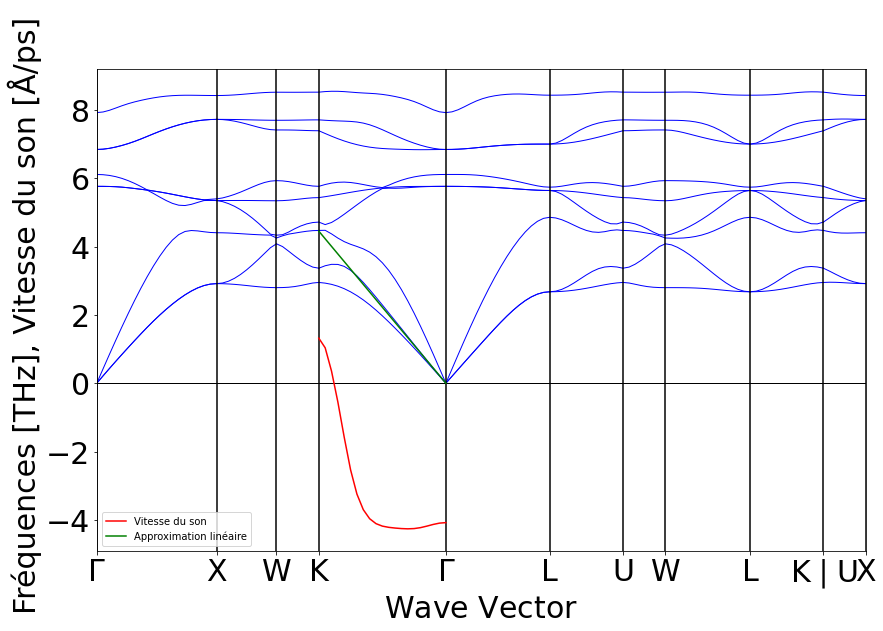

Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours K->Γ.
La vitesse maximale atteinte vaut 1.31856745906863 [Å/ps].
La vitesse minimale atteinte vaut -4.260298530044434 [Å/ps].
L'approximation donne quant à elle une valeur de -4.078756392128376 [Å/ps], correspondant bien à la vitesse en Γ.


In [5]:
fr = freq[3][1] # deuxième branche  
d = distfull[3]
v = np.flip(np.gradient(fr,d[1]-d[0])) # dérivée de la pulsation (flip car sens inverse)
pente = -v[0]
lin = np.flip(np.multiply(pente,d)) # approximation 
lin = lin- pente*d[0]

plt = phonplot.get_plot()
plt.plot(d, np.flip(v), color="red", label="Vitesse du son")
plt.plot(d, lin, color="green", label="Approximation linéaire")
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps] ")
plt.legend()
plt.show()

print("Sur ce gaphe la vitesse du son est affichée en rouger et la droite d'approximation linéaire de la dispersion sur le parcours K->Γ en vert.")
print("La vitesse maximale atteinte vaut "+ str(np.max(v))+ " [Å/ps].")
print("La vitesse minimale atteinte vaut "+ str(np.min(v))+ " [Å/ps].")
print("L'approximation donne quant à elle une valeur de -"+ str(pente) + " [Å/ps], correspondant bien à la vitesse en Γ.")

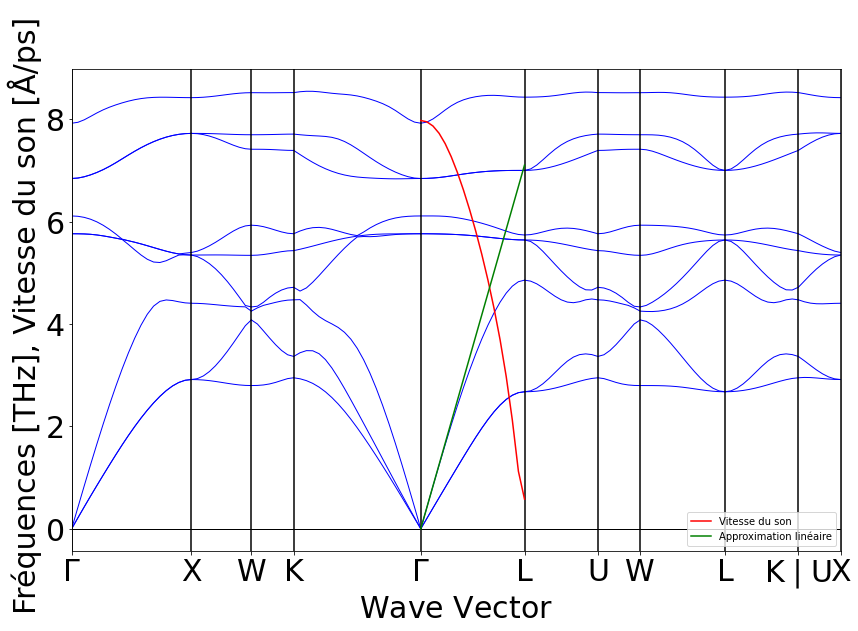

Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours Γ->L.
La vitesse maximale atteinte vaut 7.973096917335989 [Å/ps].
La vitesse minimale atteinte vaut 0.5804020406871386 [Å/ps].
L'approximation donne quant à elle une valeur de 7.973096917335989 [Å/ps], correspondant bien à la vitesse en Γ.


In [6]:
fr = freq[4][2] # troisième branche 
d = distfull[4]


v = np.gradient(fr,d[1]-d[0]) # dérivée de la pulsation
pente = v[0]
lin = np.multiply(pente,d) # approximation 
lin = lin- pente*d[0] # ajustement

plt = phonplot.get_plot()
plt.plot(d, v, color="red", label="Vitesse du son")
plt.plot(d, lin, color="green", label="Approximation linéaire")
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps] ")
plt.legend()
plt.show()

print("Sur ce gaphe la vitesse du son est affichée en rouge et la droite d'approximation linéaire de la dispersion sur le parcours Γ->L. en vert")
print("La vitesse maximale atteinte vaut "+ str(np.max(v))+ " [Å/ps].")
print("La vitesse minimale atteinte vaut "+ str(np.min(v))+ " [Å/ps].")
print("L'approximation donne quant à elle une valeur de "+ str(pente) + " [Å/ps], correspondant bien à la vitesse en Γ.")

Ces trois analyses illustrent très bien que l'approximation linéaire ne donne des valeurs de vitesse représentatives de la réalité que lorsque l'on se trouve proximité de Gamma. Dès que l'on s'éloigne de ce point d'origine l'approximation devient rapidement erronée.